In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.io import loadmat

In [134]:
data1=loadmat('2025-03-31-1559.mat')
data2=loadmat('TemperatureDatta.mat')
freq=np.squeeze(data1['dfreq'])        
S11_mag_lin=10**(data1['datamag']/10.0)     
Temperature=np.squeeze(data2['Temperature'])  

def lorentzian(f, f0, k_int, k_ext, A):
    return A * ((2*np.pi*(f-f0))**2 + ((k_ext-k_int)/2.0)**2) / ((2*np.pi*(f-f0))**2 + ((k_ext+k_int)/2.0)**2)

In [137]:
p0=[11.461e9,1e7,1e7,1e-4]  #[f0,k_int,k_ext,A]
bounds=([11e9,1e4,1e4,0.0],[12e9,1e8,1e7,3e-4])              
freq_fit=freq[slice(350,550)]

N=S11_mag_lin.shape[0]
f0_tot=np.empty(N)
k_int_tot=np.empty(N)
k_ext_tot=np.empty(N)
A_tot=np.empty(N)

for i in range(N):
    y=S11_mag_lin[i,slice(350,550)]
    popt, _=curve_fit(lorentzian,freq_fit,y,p0=p0,bounds=bounds,maxfev=10000)
    f0_tot[i],k_int_tot[i],k_ext_tot[i],A_tot[i] = popt

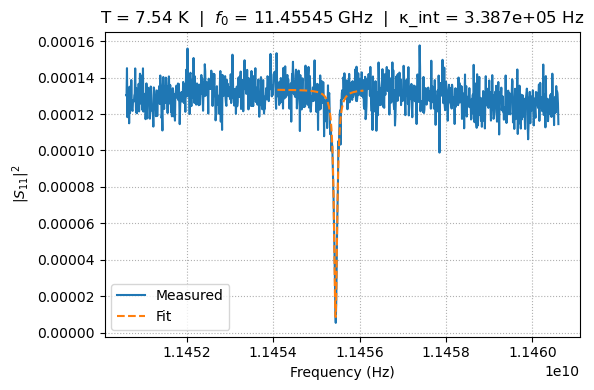

In [138]:
idx=#100 
plt.plot(freq,S11_mag_lin[idx],label='Measured')
plt.plot(freq_fit,lorentzian(freq_fit,f0_tot[idx],k_int_tot[idx],k_ext_tot[idx],A_tot[idx]),'--',label='Fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$|S_{11}|^{2}$')
plt.title(f'T = {Temperature[idx]:.2f} K  |  '
    fr'$f_0$ = {f0_tot[idx]/1e9:.5f} GHz  |  '
    fr'κ_int = {k_int_tot[idx]:.3e} Hz')
plt.legend()
plt.grid(ls=':')

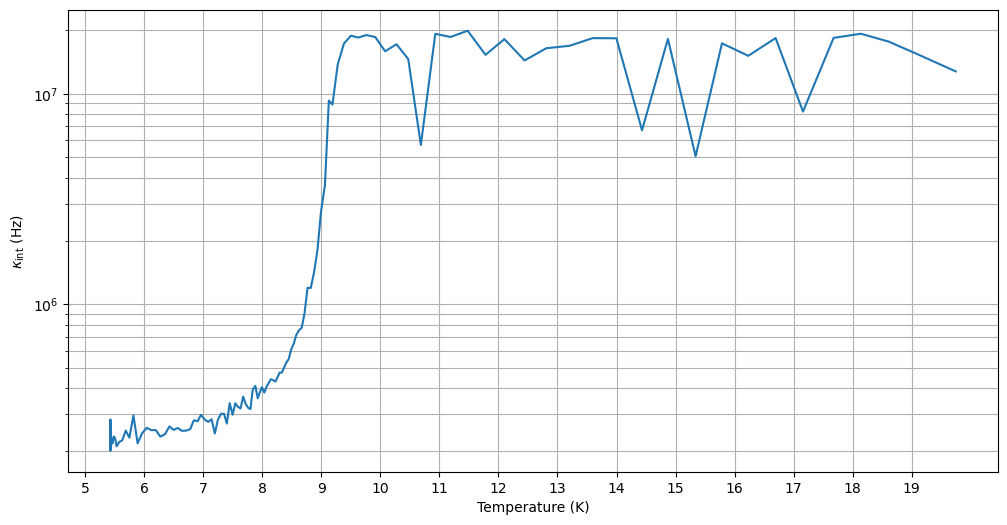

In [139]:
plt.plot(Temperature,k_int_tot)
plt.yscale('log')
plt.xlabel('Temperature (K)') 
plt.ylabel(r'$\kappa_{\rm int}$ (Hz)')
plt.xticks(np.arange(5,20,step=1))
plt.grid(True,which='both')

([<matplotlib.axis.XTick at 0x7f4778db0820>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130')])

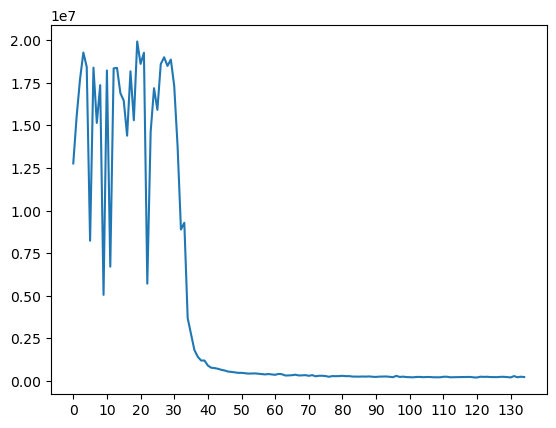

In [140]:
plt.plot(range(135), kappa_int_all)
plt.xticks(np.arange(0, 140, step=10))

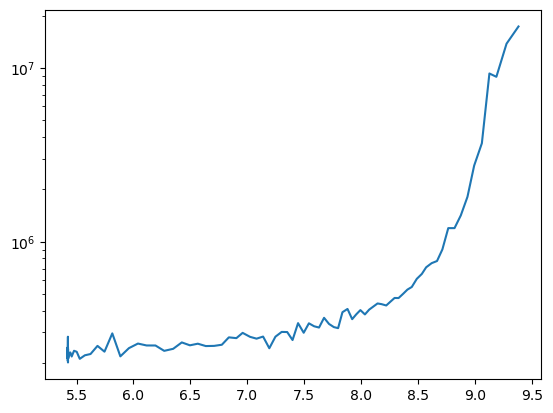

In [141]:
plt.plot(Temperature[30:135], kappa_int_all[30:135])
plt.yscale('log')

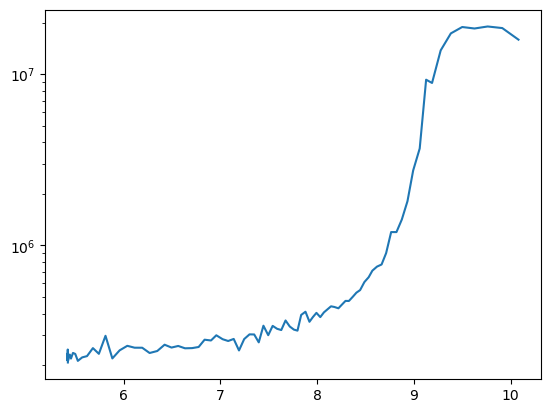

In [142]:
plt.plot(Temperature[25:120], kappa_int_all[25:120])
plt.yscale('log')

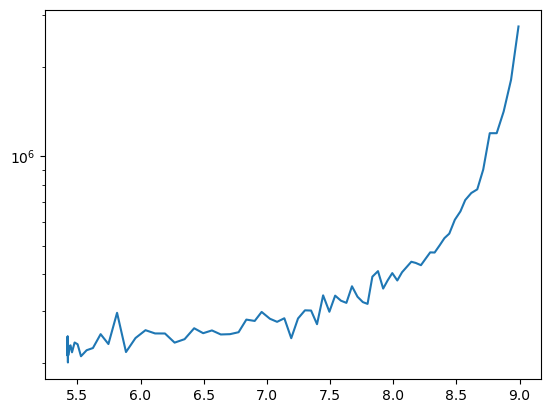

In [143]:
plt.plot(Temperature[35:125], kappa_int_all[35:125])
plt.yscale('log')

In [145]:
X=14.0e-3
Y=8.0e-3
Z=40.1e-3
e=1.6022e-19
k_b=1.38e-23
mu_0=1.2566*1e-6
eps_0=8.854e-12
f_0=np.mean(f0_tot)  


def test(T,alpha,scg,residue):
    a=(alpha*(T/(scg*e/(1.76*k_b)))**4) * ((abs(1-(T/(del0*e/(1.76 * k_b)))**4))**(-3/2)) +residue
    return a * (2*Y * Z**3 + 2*Y * X**3 + Z * X**3 + X * Z**3)/(X**3 * Z**3 * Y * mu_0*mu_0*eps_0*np.pi*4 * f_0**2)
    

alpha,scg,residue=1e-3,0.002,1e-3 #guess
bounds=([1e-4, 0.001, 1e-4],[1e-2, 0.002, 1e-2])

9.600774753114509

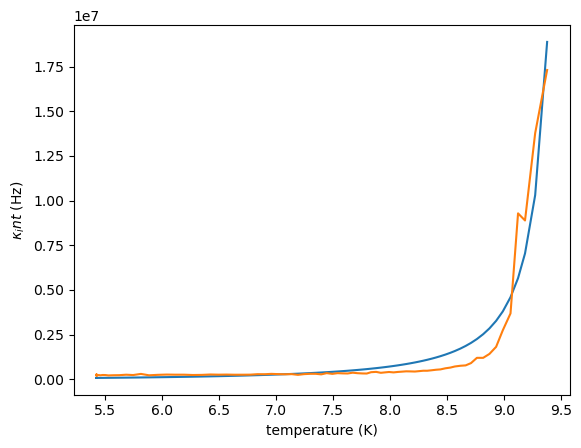

In [149]:
x= Temperature[30:135]
y = kappa_int_all[30:135]
bounds=([1e-4, 0.001, 1e-4], [1e-2, 0.002, 1e-2])
p, a = curve_fit(k_int_theory, x, y, p0 = [alpha, del0, R0], maxfev = 10000, bounds = bounds)
k_int_fit_res = [k_int_theory(t, p[0], p[1], p[2]) for t in x]
plt.plot(x, k_int_fit_res)
plt.plot(x, y)
plt.xlabel('temperature (K)')
plt.ylabel(r'$\kappa_int$ (Hz)')
T_c = p[1]*e/(1.76 * k_b)
T_c

9.98024229399834

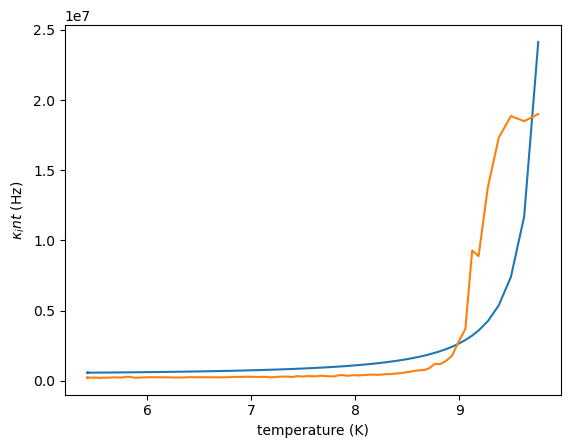

In [155]:
x = Temperature[27:120]
y = kappa_int_all[27:120]
bounds=([1e-4, 0.001, 1e-4], [1e-2, 0.002, 1e-2])
p, a = curve_fit(k_int_theory, x, y, p0 = [alpha, del0, R0], maxfev = 10000, bounds = bounds)
k_int_fit_res = [k_int_theory(t, p[0], p[1], p[2]) for t in x]
plt.plot(x, k_int_fit_res)
plt.plot(x, y)
plt.xlabel('temperature (K)')
plt.ylabel(r'$\kappa_int$ (Hz)')
T_c = p[1]*e/(1.76 * k_b)
T_c

9.213113873180914

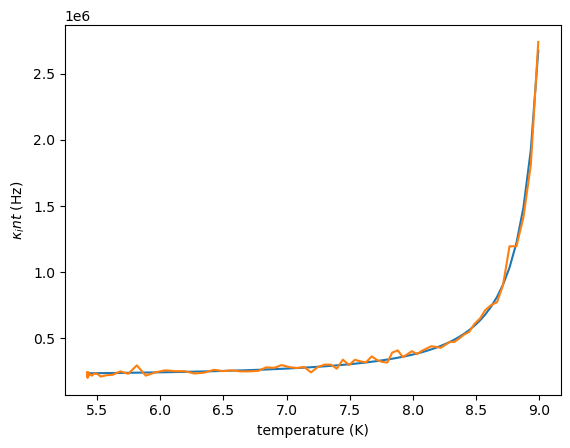

In [150]:
x=Temperature[35:125]
y=k_int_tot[35:125]
u,v=curve_fit(test,x,y,p0=[alpha,scg,residue],maxfev=10000,bounds=bounds)
output=[test(i,u[0],u[1],u[2]) for i in x]
plt.plot(x,output,label='Fit')
plt.plot(x,y,label='Measured')
plt.xlabel('temperature (K)')
plt.ylabel(r'$\kappa_int$ (Hz)')
crit=u[1]*e/(1.76*k_b)
print('The critical temperature is:', crit)